# Lab 3 - ChiSquare

**Dataset:** Titanic Test dataset

**Done by:** Manojkumar V K

**Roll no:** CB.EN.U4CSE17040


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

Q1. Read the titanic dataset

In [2]:
df = pd.read_csv("test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preprocessing

Q2. Preprocess the data

In [3]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df['Age'].fillna(method='ffill',inplace=True)
df['Cabin'].fillna(method='bfill',inplace=True)
df['Cabin'].fillna(method='ffill',inplace=True)
df['Embarked'].fillna(method='ffill',inplace=True)

In [5]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

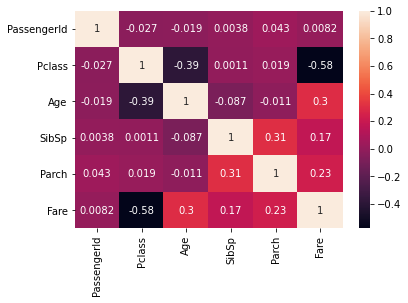

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.drop(columns=['PassengerId','Name','Age','Ticket','Fare'], inplace=True)
df1 = df.copy()
df1.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,3,male,0,0,B45,Q
1,3,female,1,0,B45,S
2,2,male,0,0,B45,Q
3,3,male,0,0,B45,S
4,3,female,1,1,B45,S


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

In [9]:
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Cabin'] = le.fit_transform(df1['Cabin'])
df1['Embarked'] = le.fit_transform(df1['Embarked'])

In [10]:
df1.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,3,1,0,0,12,1
1,3,0,1,0,12,2
2,2,1,0,0,12,1
3,3,1,0,0,12,2
4,3,0,1,1,12,2


In [11]:
train = pd.read_csv('train1.csv')
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,C85,S
1,1,1,female,1,0,C85,C
2,1,3,female,0,0,C123,S
3,1,1,female,1,0,C123,S
4,0,3,male,0,0,E46,S


In [12]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Cabin'] = le.fit_transform(train['Cabin'])
train['Embarked'] = le.fit_transform(train['Embarked'])

In [13]:
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']

## Prediction using Random Forest

In [14]:
rf = RandomForestClassifier().fit(X_train,y_train)
y_test = rf.predict(df1)

In [15]:
df['Survived'] = y_test
df.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Survived
0,3,male,0,0,B45,Q,0
1,3,female,1,0,B45,S,1
2,2,male,0,0,B45,Q,0
3,3,male,0,0,B45,S,0
4,3,female,1,1,B45,S,1


Q3. Count the total number of passengers

In [16]:
print('Total number of passengers on Titanic: ',len(df))

Total number of passengers on Titanic:  418


Q4. Count the number of passengers who survived

In [17]:
print('Total number of passengers who survived: ',len(df[df['Survived'] == 1]))

Total number of passengers who survived:  155


Q5. Measure the percentage of passengers who survived the sinking ship

In [18]:
print('Percentage of passengers who survived: ',((len(df[df['Survived'] == 1]) / len(df))*100))

Percentage of passengers who survived:  37.08133971291866


Q6. Count the number of passengers based on gender

In [19]:
print('Number of male passengers: ',len(df[df['Sex']=='male']))
print('Number of female passengers: ',len(df[df['Sex']=='female']))

Number of male passengers:  266
Number of female passengers:  152


## Chi-squared analysis

In [20]:
pd.crosstab(df['Survived'], df['Sex'],margins=True)

Sex,female,male,All
Survived,,,
0,32,231,263
1,120,35,155
All,152,266,418


In [21]:
data = pd.crosstab(df['Survived'], df['Sex'])
data

Sex,female,male
Survived,,
0,32,231
1,120,35


In [22]:
print('Percentage of male survivors: ', ((data['male'][1])/(data['male'][1] + data['female'][1]) * 100))
print('Percentage of female survivors: ', ((data['female'][1])/(data['male'][1] + data['female'][1]) * 100))

Percentage of male survivors:  22.58064516129032
Percentage of female survivors:  77.41935483870968


Q7. Run a chi-square test for the following hypothesis

**Hypothesis:** The proportion of females onboard who survived the sinking of the Titanic was higher than the proportion of males onboard who survived the sinking of the Titanic.

In [23]:
hypothesis = 'The proportion of females onboard who survived the sinking of the Titanic was higher than the proportion of males onboard who survived the sinking of the Titanic.'

In [24]:
data['female'] = (data['female']/(data.sum().sum()))*100
data['male'] = (data['male']/(data.sum().sum()))*100
data

Sex,female,male
Survived,,
0,7.655502,76.398076
1,28.708134,11.575466


In [25]:
chiStats = stats.chi2_contingency(data)
chiStats

(47.88560093830486,
 4.5182775371807816e-12,
 1,
 array([[24.58229949, 59.47127867],
        [11.78133687, 28.50226312]]))

In [26]:
criticalValue = stats.chi2.ppf(q=0.95, df = chiStats[2])

In [27]:
print('Critical value     = ',criticalValue)
print('Chi squared        = ',chiStats[0])
print('P value            = ',chiStats[1])
print('Degree of freedom  = ',chiStats[2])
print('Expected cross tab = \n',chiStats[3])

Critical value     =  3.841458820694124
Chi squared        =  47.88560093830486
P value            =  4.5182775371807816e-12
Degree of freedom  =  1
Expected cross tab = 
 [[24.58229949 59.47127867]
 [11.78133687 28.50226312]]


Q8. Inference based on test

In [28]:
if chiStats[0] < criticalValue:
    print('At 0.95 level of confidence, we reject the hypothesis:\n', hypothesis)
else:
    print('At 0.95 level of confidence, we accept the hypothesis:\n', hypothesis)

At 0.95 level of confidence, we accept the hypothesis:
 The proportion of females onboard who survived the sinking of the Titanic was higher than the proportion of males onboard who survived the sinking of the Titanic.
